Accuracy: 66.67%
              precision    recall  f1-score   support

     Class 0       0.50      1.00      0.67         1
     Class 1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

Prediction for Feature1=5, Feature2=2: Class 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


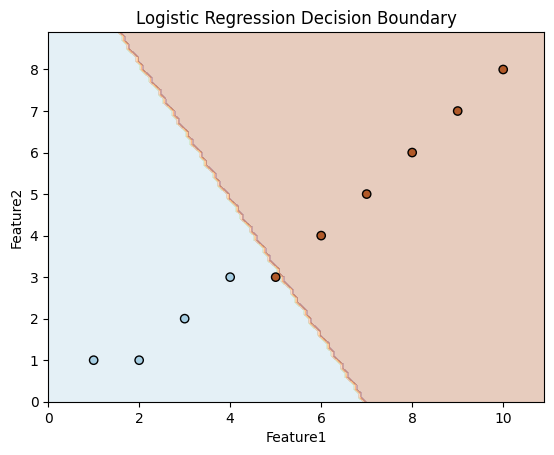

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Sample Dataset
data = {
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature2': [1, 1, 2, 3, 3, 4, 5, 6, 7, 8],
    'Target':   [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)

X = df[['Feature1', 'Feature2']]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print(classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"]))

sample = pd.DataFrame([[5, 2]], columns=['Feature1', 'Feature2'])
prediction = model.predict(sample)
print(f"Prediction for Feature1=5, Feature2=2: {'Class 1' if prediction[0] == 1 else 'Class 0'}")

# Plot decision boundary
x_min, x_max = X['Feature1'].min() - 1, X['Feature1'].max() + 1
y_min, y_max = X['Feature2'].min() - 1, X['Feature2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X['Feature1'], X['Feature2'], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Logistic Regression Decision Boundary')
plt.show()
